<a href="https://colab.research.google.com/github/bhuvaneshkj/handson-ml/blob/master/updated_heart_algo_extopian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
pip install heartpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.1 MB/s eta 0:00:00


In [18]:
import pandas as pd
import numpy as np
import pylab as pl
from pylab import *
import heartpy as hp
import scipy.signal as signal

In [ ]:
#import fir_filter

In [ ]:
ppg_data_path = '/content/sample_data/MAX86171_20241206_144242.ppg - MAX86171_20241206_144242.ppg.csv'


In [45]:

ppg_data = pd.read_csv(ppg_data_path)

In [ ]:
ppg_data

,timestamp,sampleNum,tagLEDC1_PD1,tagLEDC1_PD2,LEDC1_PD1,LEDC1_PD2,ACCX,ACCY,ACCZ,temperature,RTC,sensor,regAddr,val,I2Caddr
0,1733514162460,1,1,1,56531,35375,-111,-1011,1809,NaN,NaN,NaN,NaN,NaN,NaN
1,1733514162468,2,1,1,56546,35348,-131,-1011,1813,NaN,NaN,NaN,NaN,NaN,NaN
2,1733514162475,3,1,1,56554,35322,-119,-1055,1813,NaN,NaN,NaN,NaN,NaN,NaN
3,1733514162483,4,1,1,56578,35292,-115,-1063,1817,NaN,NaN,NaN,NaN,NaN,NaN
4,1733514162491,5,1,1,56602,35270,-127,-1079,1825,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4636,1733514198629,4637,1,1,54197,36584,-123,-1167,1749,NaN,NaN,NaN,NaN,NaN,NaN
4637,1733514198636,4638,1,1,54175,36568,-123,-1179,1753,NaN,NaN,NaN,NaN,NaN,NaN
4638,1733514198644,4639,1,1,54172,36553,-119,-1171,1741,NaN,NaN,NaN,NaN,NaN,NaN
4639,1733514198652,4640,1,1,54133,36539,-123,-1191,1745,NaN,NaN,NaN,NaN,NaN,NaN


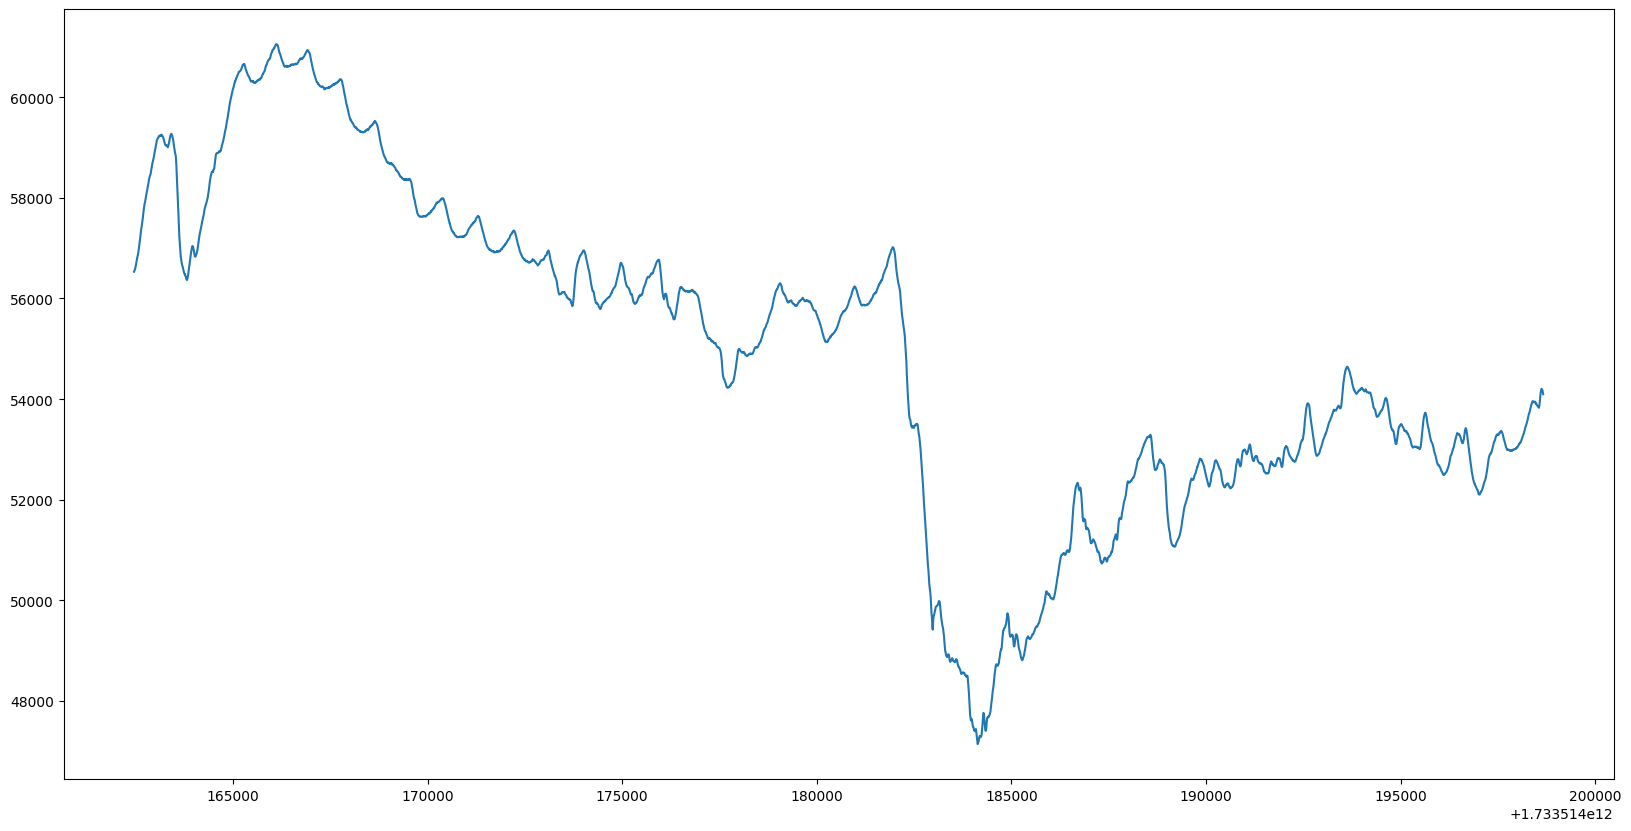

In [ ]:
pl.figure(figsize=(20,10))
pl.plot(ppg_data['timestamp'],ppg_data['LEDC1_PD1'])

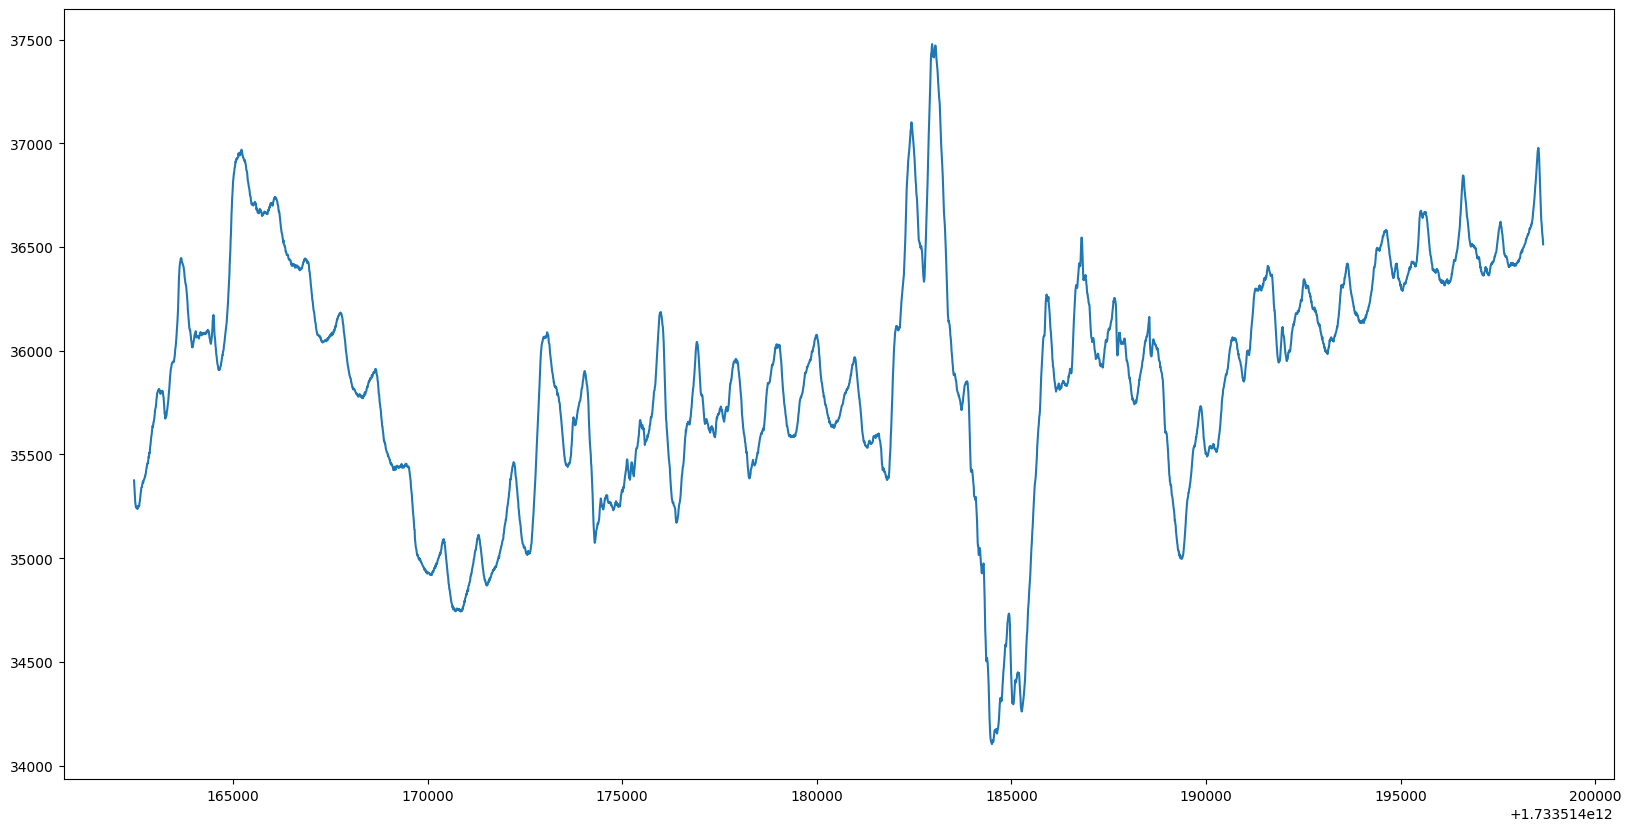

In [ ]:
pl.figure(figsize=(20,10))
pl.plot(ppg_data['timestamp'],ppg_data['LEDC1_PD2'])

In [34]:
import pandas as pd

# Assuming 'data' is your DataFrame with the 'timestamp' column in milliseconds
ppg_data['timestamp'] = ppg_data['timestamp'] / 1000.0  # Convert to seconds

# Recalculate the sampling frequency
time_diffs = ppg_data['timestamp'].diff().dropna()
fs = 1 / time_diffs.mean()

print(f"Updated Sampling Frequency: {fs:.2f} Hz")



Updated Sampling Frequency: 128.18 Hz


In [35]:
# Normalize the PPG signal (min-max scaling)
ppg_signal = ppg_data['LEDC1_PD2']
ppg_normalized = (ppg_signal - ppg_signal.min()) / (ppg_signal.max() - ppg_signal.min())


In [36]:
from scipy.signal import butter, filtfilt

def bandpass_filter(signal, fs, lowcut=0.5, highcut=3.5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(2, [low, high], btype='band')  # 2nd-order Butterworth filter
    return filtfilt(b, a, signal)

ppg_filtered = bandpass_filter(ppg_normalized, fs)


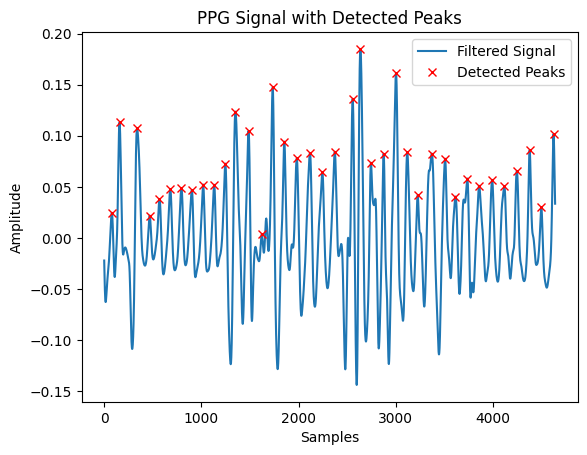

In [37]:
from scipy.signal import find_peaks

# Find peaks in the filtered signal
peaks, _ = find_peaks(ppg_filtered, distance=fs*0.6)  # Minimum 0.6s between peaks (~100 BPM)

# Optional: Visualize the signal with detected peaks
import matplotlib.pyplot as plt

plt.plot(ppg_filtered, label="Filtered Signal")
plt.plot(peaks, ppg_filtered[peaks], "rx", label="Detected Peaks")
plt.legend()
plt.title("PPG Signal with Detected Peaks")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()


In [38]:
# Calculate intervals between peaks (in seconds)
peak_intervals = np.diff(peaks) / fs

# Convert intervals to BPM
heart_rate = 60 / peak_intervals.mean()
print(f"Estimated Heart Rate: {heart_rate:.2f} BPM")


Estimated Heart Rate: 62.59 BPM


In [42]:
heart_rate

62.59403559459401

Updated Sampling Frequency: 128.18 Hz


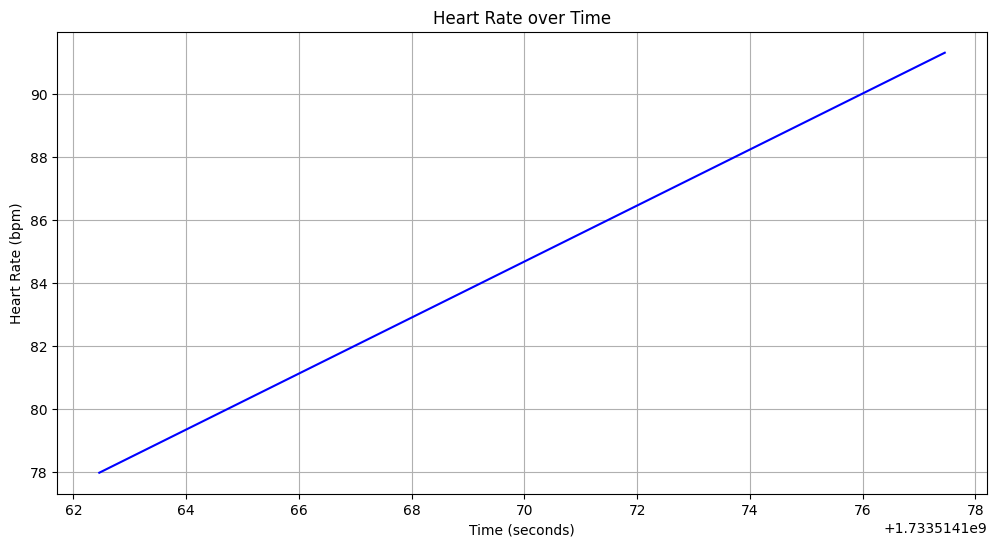

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

ppg_data = pd.read_csv(ppg_data_path)

# Assuming your signal is in 'data_resampled' and sampling frequency is 'fs'
# Apply bandpass filter to the PPG signal (filtering is important for accurate peak detection)

# Assuming 'data' is your DataFrame with the 'timestamp' column in milliseconds
ppg_data['timestamp'] = ppg_data['timestamp'] / 1000.0  # Convert to seconds

# Recalculate the sampling frequency
time_diffs = ppg_data['timestamp'].diff().dropna()
fs = 1 / time_diffs.mean()

print(f"Updated Sampling Frequency: {fs:.2f} Hz")

# Filter function (assuming fs is your sampling frequency)
def bandpass_filter(signal, fs, lowcut=0.5, highcut=3.5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(2, [low, high], btype='band')
    return filtfilt(b, a, signal)

# Bandpass filter the signal
ppg_filtered = bandpass_filter(ppg_normalized, fs)

# Define window size in seconds (e.g., 30 seconds)
window_size_sec = 15
window_size_samples = int(window_size_sec * fs)  # Cast to integer

# Compute heart rate over time
heart_rates = []
timestamps = []

for start_idx in range(0, len(ppg_filtered) - window_size_samples, window_size_samples):
    end_idx = start_idx + window_size_samples
    window_signal = ppg_filtered[start_idx:end_idx]

    # Detect peaks in the window
    peaks, _ = find_peaks(window_signal, distance=int(fs * 0.08))  # Minimum peak distance (0.6s)

    if len(peaks) > 1:
        peak_intervals = np.diff(peaks) / fs  # Time between consecutive peaks (in seconds)
        avg_interval = peak_intervals.mean()  # Average interval between peaks
        bpm = 60 / avg_interval  # Convert to beats per minute
        heart_rates.append(bpm)
        timestamps.append(ppg_data['timestamp'].iloc[start_idx])  # Use the timestamp of the window start

# Plot the heart rate over time
plt.figure(figsize=(12, 6))
plt.plot(timestamps, heart_rates, label='Heart Rate (bpm)', color='b')
plt.xlabel('Time (seconds)')
plt.ylabel('Heart Rate (bpm)')
plt.title('Heart Rate over Time')
plt.grid(True)
plt.show()
